In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ni
import scipy.misc as mi
from PIL import Image
from scipy import misc
import glob
import cv2
import os
import tensorflow as tf
from scipy.misc import toimage
import scipy
import pandas as pd


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

ImportError: No module named 'cv2'

In [5]:
dataset = pd.read_csv("corpus.csv")
# split into input (X) and output (Y) variables
dataset.fillna(0)
Y=dataset['review$Stars']
X = dataset.ix[:,1:7394]
#X = dataset.drop(['Unnamed: 0'], axis=1)

In [34]:
# create model
model = Sequential()
model.add(Dense(128, input_dim=7393, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.85))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.9))
model.add(Dense(1, activation='sigmoid'))

In [35]:
X.head(5)

,abil,absolut,act,action,add,arriv,astound,awe,beauti,blow,...,charactersi,hopedstil,queen,theoryon,hoursth,highter,inconclusivewel,wellflow,irlf,surf
0,7.321928,5.426625,3.107803,9.18149,6.53952,7.643856,8.643856,7.442222,4.698998,7.058894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,5.426625,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.698998,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,3.107803,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_22 (Dense)                 (None, 128)           946432      dense_input_7[0][0]              
____________________________________________________________________________________________________
dropout_16 (Dropout)             (None, 128)           0           dense_22[0][0]                   
____________________________________________________________________________________________________
dense_23 (Dense)                 (None, 256)           33024       dropout_16[0][0]                 
____________________________________________________________________________________________________
dropout_17 (Dropout)             (None, 256)           0           dense_23[0][0]                   
___________________________________________________________________________________________

In [37]:
# Compile model
#from keras.optimizers import SGD
#sgd = SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [38]:
index = 0.75*len(X)
train_X = X.ix[0:index,]
test_X = X.ix[index:,]
train_Y = Y.ix[0:index,]
test_Y = Y.ix[index:,]

In [39]:
# Fit the model
#history=model.fit(train_X.as_matrix(), train_Y.as_matrix(),validation_data=(test_X.as_matrix(), test_Y.as_matrix()), nb_epoch=20, batch_size=15)
history=model.fit(X.as_matrix(), Y.as_matrix(), validation_split=0.33, nb_epoch=10, batch_size=15)

Train on 2679 samples, validate on 1321 samples
Epoch 1/10
2679/2679 [==============================] - 4s - loss: 1.2811 - acc: 0.7018 - val_loss: 0.6263 - val_acc: 0.7767
Epoch 2/10
2679/2679 [==============================] - 4s - loss: 0.8839 - acc: 0.8055 - val_loss: 0.7829 - val_acc: 0.7767
Epoch 3/10
2679/2679 [==============================] - 4s - loss: 0.9180 - acc: 0.8272 - val_loss: 0.8890 - val_acc: 0.7767
Epoch 4/10
2679/2679 [==============================] - 4s - loss: 0.8743 - acc: 0.8417 - val_loss: 1.0317 - val_acc: 0.7767
Epoch 5/10
2679/2679 [==============================] - 4s - loss: 0.7957 - acc: 0.8522 - val_loss: 1.1699 - val_acc: 0.7767
Epoch 6/10
2679/2679 [==============================] - 4s - loss: 0.9079 - acc: 0.8507 - val_loss: 1.3402 - val_acc: 0.7767
Epoch 7/10
2679/2679 [==============================] - 4s - loss: 0.8468 - acc: 0.8537 - val_loss: 1.4508 - val_acc: 0.7721
Epoch 8/10
2679/2679 [==============================] - 4s - loss: 0.8037 - a

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])


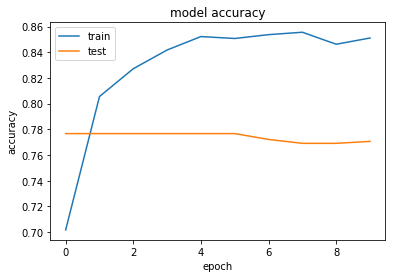

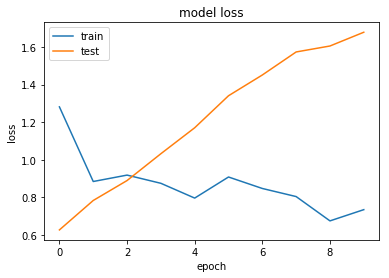

In [40]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

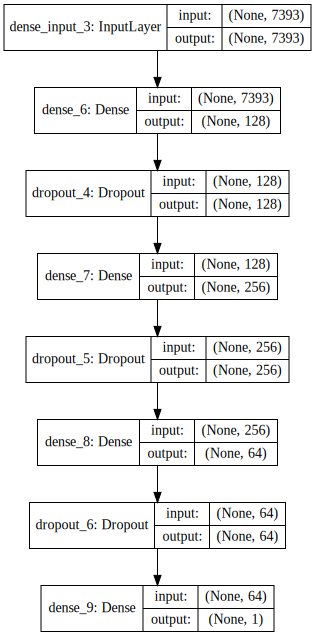

In [14]:
from IPython.display import Image, display, SVG
from keras.utils.visualize_util import model_to_dot

# Show the model in ipython notebook
figure = SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))
display(figure)